#### Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Dataset description

### The dataset comprises of 13 variables, with the last one, Loan_Status being the value we need to predict.



# Description of data

Loan_ID	: Loan reference number (unique ID) \
Gender : Applicant gender (Male or Female) \
Married : Applicant marital status (Married or not married) \
Dependents : Number of family members \
Education : Applicant education/qualification (graduate or not graduate) \
Self_Employed : Applicant employment status \
ApplicantIncome	: Applicant's monthly salary/income \
CoapplicantIncome : Additional applicant's monthly salary/income	\
LoanAmount	: Loan amount in cash \
Loan_Amount_Term : The loan's repayment period (in days) \
Credit_History : Records of previous credit history\
Property_Area : The location of property \
Loan_Status	: Status of loan (Y: accepted, N: not accepted)\

In [135]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

Reading data from csv file...

In [136]:
df = pd.read_csv('loans_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


We can see some nan values (we will care about them later)

In [138]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [139]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


### We can get rid of duplicates, and also useless for us Loan Id

In [140]:
df = df.drop("Loan_ID", axis=1)
df = df.drop_duplicates()

### Let's check how the categorical data looks like

## Data exploration

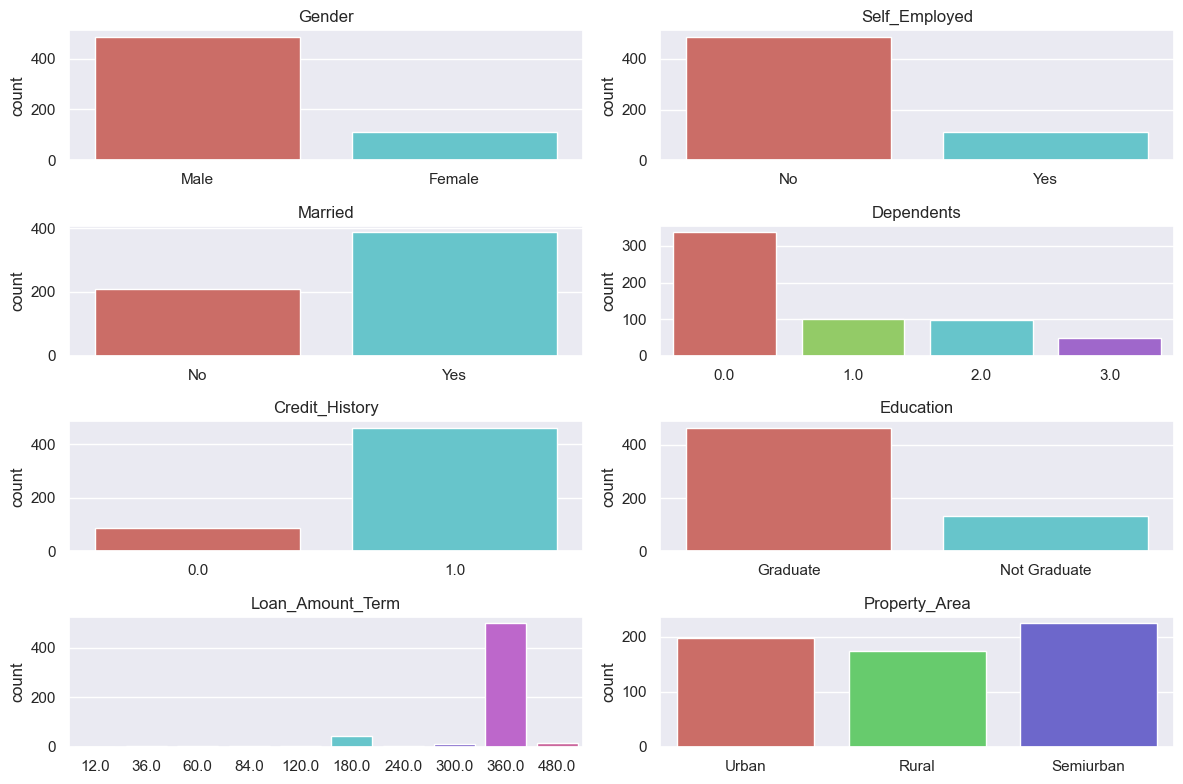

In [141]:
import seaborn as sns
sns.set(style="darkgrid")
fig, axes = plt.subplots(4, 2, figsize=(12, 8))
sns_plot1 = sns.countplot(x="Gender", data=df, palette="hls", ax=axes[0,0]).set(title='Gender')
sns_plot2 = sns.countplot(x="Married", data=df, palette="hls", ax=axes[1,0]).set(title='Married')
sns_plot3 = sns.countplot(x="Dependents", data=df, palette="hls", ax=axes[1,1]).set(title='Dependents')
sns_plot4 = sns.countplot(x="Education", data=df, palette="hls", ax=axes[2,1]).set(title='Education')
sns_plot5 = sns.countplot(x="Self_Employed", data=df, palette="hls", ax=axes[0,1]).set(title='Self_Employed')
sns_plot6 = sns.countplot(x="Credit_History", data=df, palette="hls", ax=axes[2,0]).set(title='Credit_History')
sns_plot7 = sns.countplot(x="Property_Area", data=df, palette="hls", ax=axes[3,1]).set(title='Property_Area')
sns_plot8 = sns.countplot(x="Loan_Amount_Term", data=df, palette="hls", ax=axes[3,0]).set(title='Loan_Amount_Term')
for ax in axes.flat:
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

Conclusions: \
There are much more men than women who applied \
Most of the people are not self-employed\
Most of them are married\
Plenty of people have positive credit history, and also graduated from university\
Loan amount term is almost always equal to 360 days, we will see if the small amount of 180 days loans can be useful for us\
Property Area is very nicely balanced

### And what about the numerical data?

In [142]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Loan_Status')
Y = df['Loan_Status']


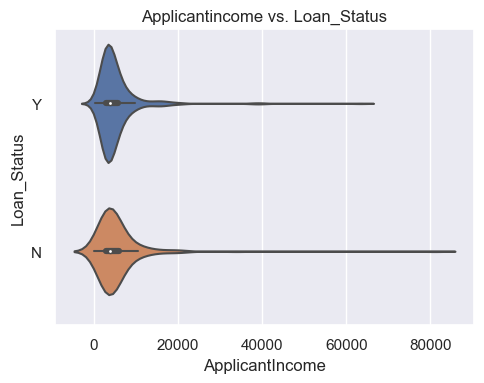

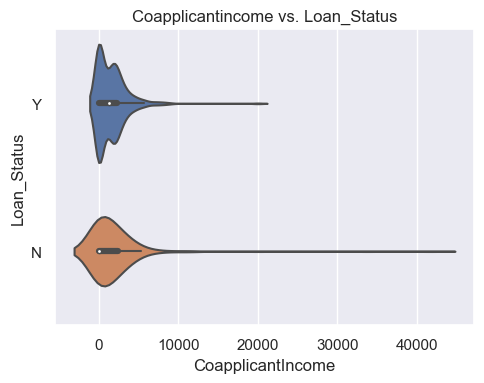

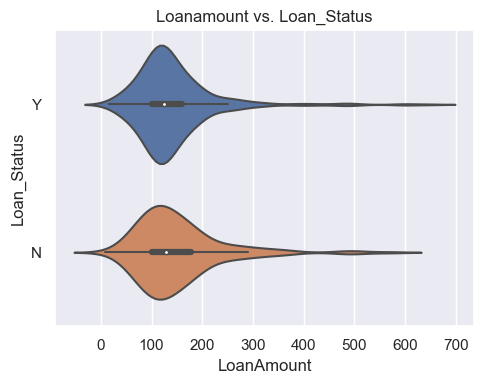

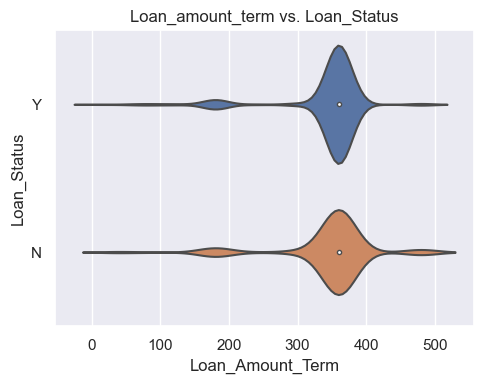

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box(X, Y, x):
    plt.figure(figsize=(5, 4))
    sns.violinplot(data=X, x=x, y=Y)
    plt.title(f"{x.capitalize()} vs. Loan_Status")
    plt.tight_layout()

#splitting into continuous and categorical variables
cont_feat = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
cat_feat = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']

for col in cont_feat:
    plot_box(X, Y, col)
plt.show()

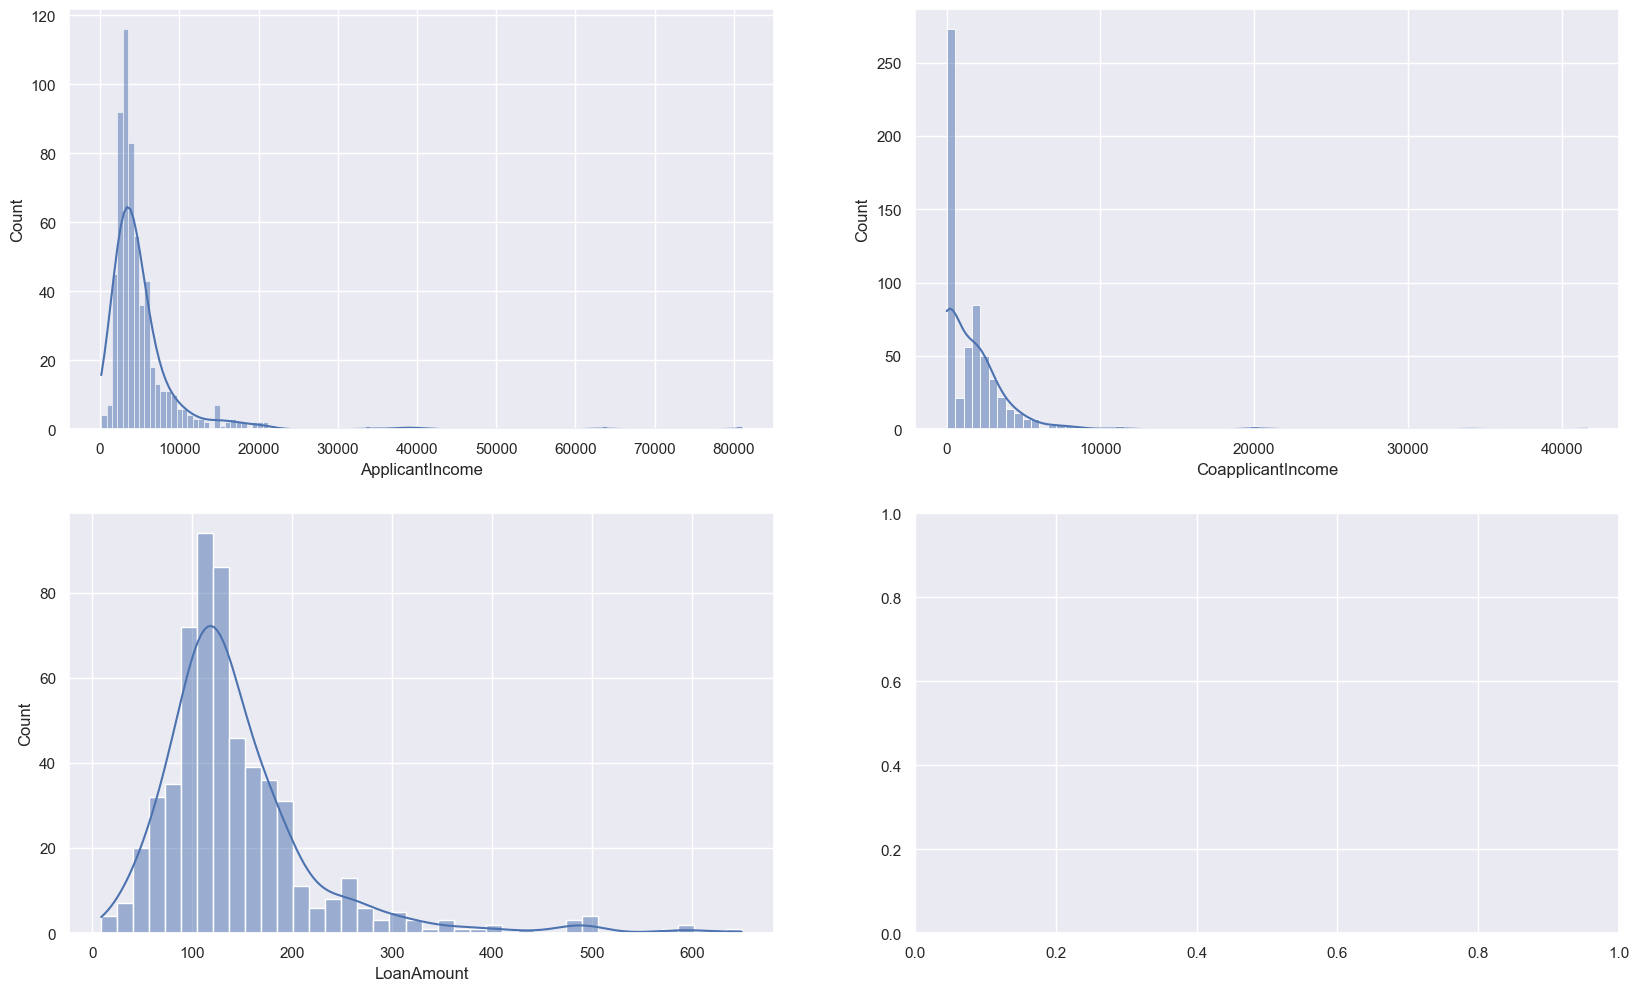

In [144]:

fig, axs = plt.subplots(2, 2, figsize=(20, 12))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0],)
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0]);

## Conclusions:
### Applicant income, Cooaplicant income are positively skewed and there are plenty of outliers

## Dealing with missing values, cleaning the data

In [145]:
df.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [146]:
XY = pd.concat([X, Y], axis=1)
#how much empty values is the maximum you can survive? 0 is recommended
maxempty = 0
print("Before dropping all rows with 2 or more missing values",XY.shape)
XY.dropna(thresh=XY.shape[1] - maxempty, inplace=True)
print("After dropping all rows with 2 or more missing values",XY.shape)
X = XY.iloc[:,:-1]
Y = XY.iloc[:,-1]

Before dropping all rows with 2 or more missing values (598, 12)
After dropping all rows with 2 or more missing values (505, 12)


### Deleting plenty of rows will prove beneficial in the end 

If we decided to delete all NaN values this will do nothing

In [147]:
empty_collumns = ['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']
for column in empty_collumns:
    if column in cont_feat:
        mean_value = X[column].mean()
        X[column].fillna(mean_value, inplace=True)
    else:
        mode_value = X[column].mode()[0]
        X[column].fillna(mode_value, inplace=True)
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### One hot encoding (categorical variables into numerical, easier for computer to understand)

In [148]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban


In [149]:
X = pd.get_dummies(X)
X = X.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No'], axis = 1)
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed'}
X.rename(columns=new, inplace=True)
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128.0,360.0,1.0,True,True,True,False,True,False,False
2,0.0,3000,0.0,66.0,360.0,1.0,True,True,True,True,False,False,True
3,0.0,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,False,True
4,0.0,6000,0.0,141.0,360.0,1.0,True,False,True,False,False,False,True
5,2.0,5417,4196.0,267.0,360.0,1.0,True,True,True,True,False,False,True


### Changing Y and N into 0 and 1

In [150]:
X = X.replace({True: 1.0, False: 0.0})
Y = Y.replace({'Y': 1.0, 'N': 0.0})
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128.0,360.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,3000,0.0,66.0,360.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,2.0,5417,4196.0,267.0,360.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


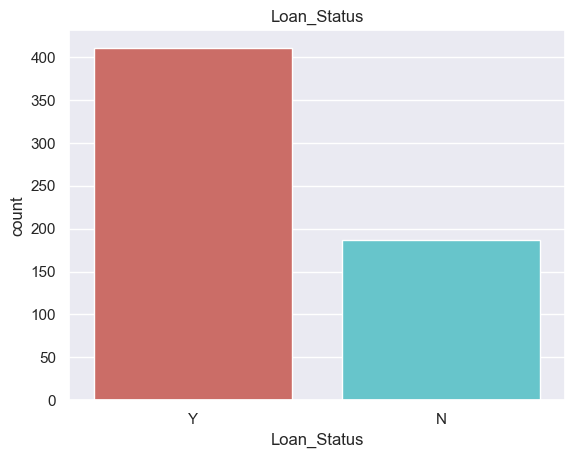

In [151]:
sns.countplot(x="Loan_Status", data=df, palette="hls").set(title='Loan_Status')
plt.show()

## Imbalanced data! We will have to resample the data with SMOTE

### Dividing into train, test and validation sets

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state = 10)

### Balancing the Train set (The predicted variable is not balanced)

Text(0.5, 1.0, 'Original Data')

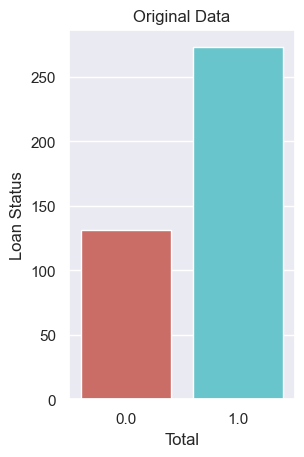

In [153]:
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, data=X_train, palette='hls')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('Original Data')

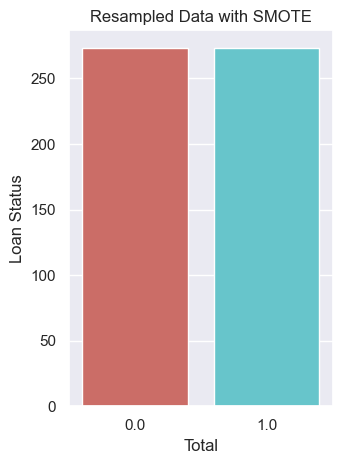

In [154]:
#%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train, y_train = SMOTE().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)

plt.subplot(1, 2, 2)
sns.countplot(x=y_train, data=X_train, palette='hls')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('Resampled Data with SMOTE')
plt.tight_layout()
plt.show()

### After preparing the sets, we should now take a look and see, if there are some values with very high correlation, which add unwanted noise to our model

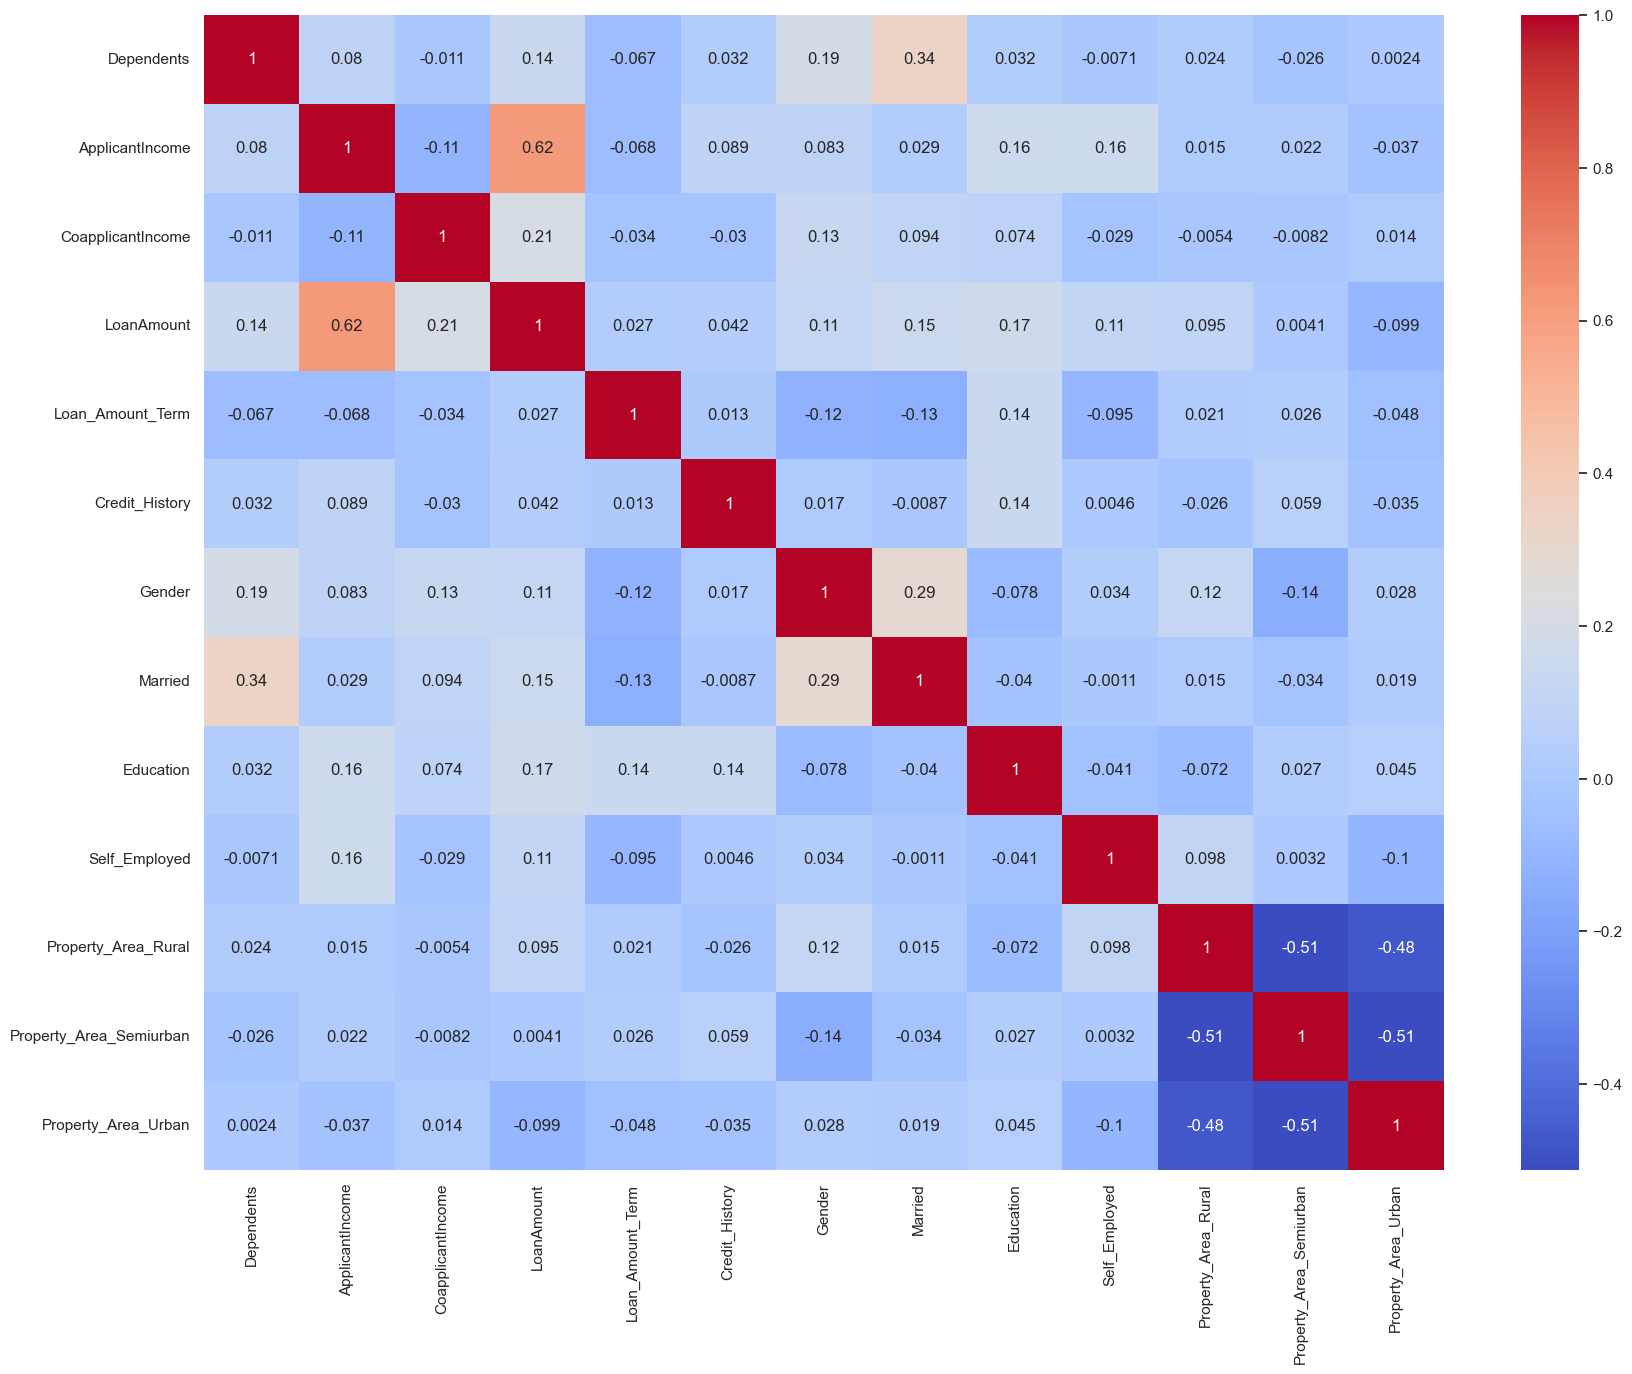

In [155]:
X_train_corr = X_train.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(X_train_corr, cmap='coolwarm', annot=True, ax=ax)
plt.show()

### Applicant income and Loan ammount are somewhat correlated, however the factor is only 0.6 so we can't 'merge' both of the variables

### MinMaxScaler is a preprocessing technique that scales and translates each feature to a specified range, typically [0, 1], preserving the original shape of the distribution

In [156]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test.values)  

C:\Users\julek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### After scaling and checking correlations we can check if there are some variables that are not needed by the model, only adding noise, or giving very small information, making the model more complicated at the same time

## Principal component analysis (PCA) - Using only some of all 13 variables. We can check how each of the models behaves depending on the number of variables

logistic regression

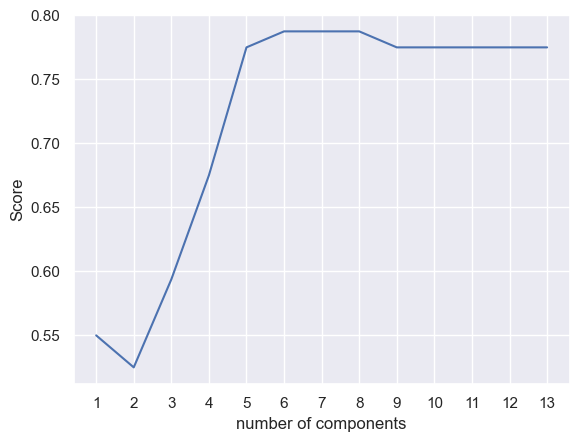

Logistic regression works best for number of components = 6 and its accuracy is equal to 0.7875


In [157]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
score_list_logist = []
for i in range (1,14):
    nofcomponents = i #only these number of most important factors will be used in models
    pca = PCA(n_components=nofcomponents)
    pca.fit(X_train_s)
    X_train_p = pca.transform(X_train_s)
    X_test_p = pca.transform(X_test_s)
    logistic_reg = LogisticRegression(max_iter=300)
    logistic_reg.fit(X_train_p, y_train)
    y_pred_test = logistic_reg.predict(X_test_p)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    score_list_logist.append(test_accuracy)
plt.plot(range(1,14), score_list_logist)
plt.xticks(np.arange(1,14,1))
plt.xlabel("number of components")
plt.ylabel("Score")
plt.show()
best_logist = max(score_list_logist)
best_indexl = score_list_logist.index(max(score_list_logist))
print("Logistic regression works best for number of components =",best_indexl+1,"and its accuracy is equal to", best_logist)


knn

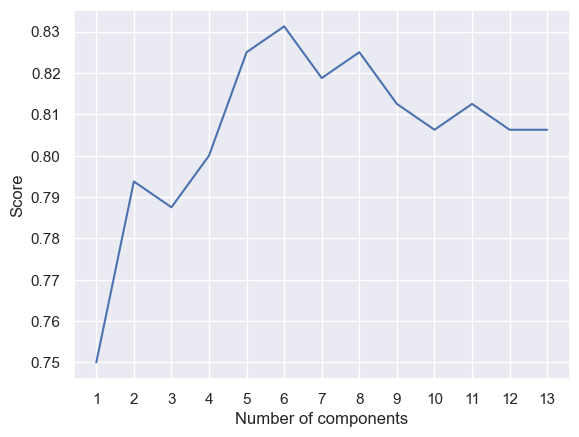

KNN works best for number of components = 6 and its accuracy is equal to 0.83125


In [158]:
from sklearn.neighbors import KNeighborsClassifier
score_list_knn = []
maxnei = 25
for i in range (1,14):
    scoreListknn = []
    for a in range(1,maxnei):
        nofcomponents = i#only these number of most important factors will be used in models
        pca = PCA(n_components=nofcomponents)
        pca.fit(X_train_s)
        X_train_p = pca.transform(X_train_s)
        X_test_p = pca.transform(X_test_s)
        KNclassifier = KNeighborsClassifier(n_neighbors = a)
        KNclassifier.fit(X_train_p, y_train)
        scoreListknn.append(KNclassifier.score(X_test_p, y_test))
    good_knn = max(scoreListknn)
    score_list_knn.append(good_knn)
plt.plot(range(1,14), score_list_knn)
plt.xticks(np.arange(1,14,1))
plt.xlabel("Number of components")
plt.ylabel("Score")
plt.show()
best_knn = max(score_list_knn)
best_indexk =  score_list_knn.index(max(score_list_knn))
print("KNN works best for number of components =",best_indexk+1,"and its accuracy is equal to", best_knn)




svc


C:\Users\julek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


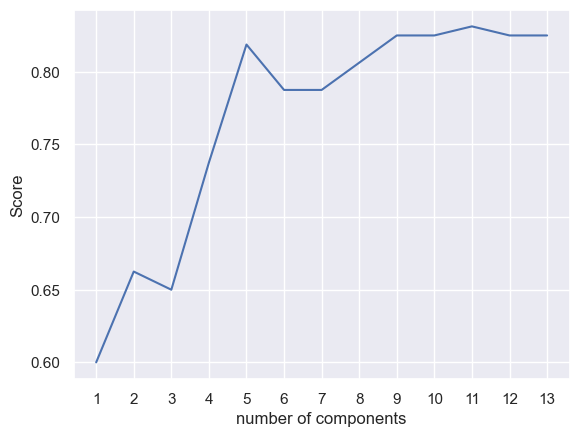

Svc works best for number of components = 11 and its accuracy is equal to 0.83125


In [159]:
from sklearn.svm import SVC
score_list_svc = []
for i in range (1,14):
    nofcomponents = i #only these number of most important factors will be used in models
    pca = PCA(n_components=nofcomponents)
    pca.fit(X_train_s)
    X_train_p = pca.transform(X_train_s)
    X_test_p = pca.transform(X_test_s)
    SVCclassifier = SVC(kernel='rbf', max_iter=500)
    SVCclassifier.fit(X_train_p, y_train)   
    y_pred = SVCclassifier.predict(X_test_p)
    test_accuracy = accuracy_score(y_test, y_pred)
    score_list_svc.append(test_accuracy)

plt.plot(range(1,14), score_list_svc)
plt.xticks(np.arange(1,14,1))
plt.xlabel("number of components")
plt.ylabel("Score")
plt.show()
best_svc = max(score_list_svc)
best_indexs = score_list_svc.index(max(score_list_svc))
print("Svc works best for number of components =",best_indexs+1,"and its accuracy is equal to", best_svc)

Gaussian naive bayes

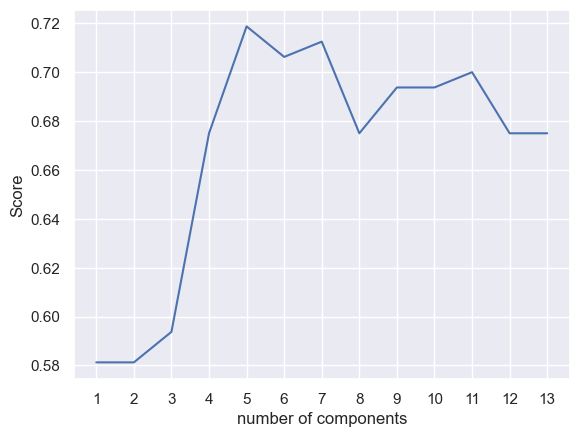

GaussNB works best for number of components = 5 and its accuracy is equal to 0.71875


In [160]:
from sklearn.naive_bayes import GaussianNB
score_list_gauss = []
for i in range (1,14):
    nofcomponents = i #only these number of most important factors will be used in models
    pca = PCA(n_components=nofcomponents)
    pca.fit(X_train_s)
    X_train_p = pca.transform(X_train_s)
    X_test_p = pca.transform(X_test_s)
    NBclassifier = GaussianNB()
    NBclassifier.fit(X_train_p, y_train)
    y_pred = NBclassifier.predict(X_test_p)
    test_accuracy = accuracy_score(y_test, y_pred)
    score_list_gauss.append(test_accuracy)

plt.plot(range(1,14), score_list_gauss)
plt.xticks(np.arange(1,14,1))
plt.xlabel("number of components")
plt.ylabel("Score")
plt.show()
best_gauss = max(score_list_gauss)
best_indexn = score_list_gauss.index(max(score_list_gauss))
print("GaussNB works best for number of components =",best_indexn+1,"and its accuracy is equal to", best_gauss)

Decision tree

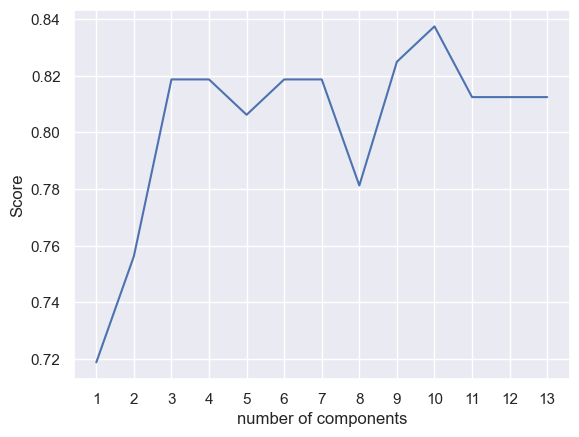

Decision tree works best for number of components = 10 and its accuracy is equal to 0.8375


In [161]:
from sklearn.tree import DecisionTreeClassifier
score_list_decision_tree = []
max_leaf = 25
for i in range (1,14):
    scoreListDT = []
    for a in range(2,max_leaf):
        nofcomponents = i #only these number of most important factors will be used in models
        pca = PCA(n_components=nofcomponents)
        pca.fit(X_train_s)
        X_train_p = pca.transform(X_train_s)
        X_test_p = pca.transform(X_test_s)
        DTclassifier = DecisionTreeClassifier(max_leaf_nodes=a)
        DTclassifier.fit(X_train_p, y_train)
        scoreListDT.append(DTclassifier.score(X_test_p, y_test))
        test_accuracy = accuracy_score(y_test, y_pred)
    good_dec_tree = max(scoreListDT)
    score_list_decision_tree.append(good_dec_tree)

plt.plot(range(1,14), score_list_decision_tree)
plt.xticks(np.arange(1,14,1))
plt.xlabel("number of components")
plt.ylabel("Score")
plt.show()
best_dec_tree = max(score_list_decision_tree)
best_indexd = score_list_decision_tree.index(max(score_list_decision_tree))
print("Decision tree works best for number of components =",best_indexd+1,"and its accuracy is equal to", best_dec_tree)


Random forest

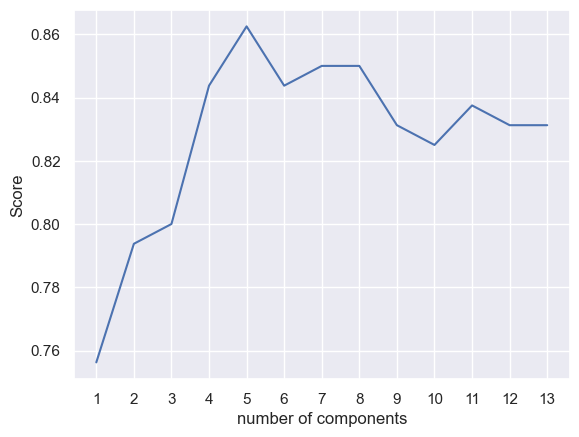

Random forest works best for number of components = 5 and its accuracy is equal to 0.8625


In [164]:
from sklearn.ensemble import RandomForestClassifier
score_list_random_forest = []
max_iter = 30
for i in range (1,14):
    scoreListRF = []
    for a in range(2,max_iter):
        nofcomponents = i #only these number of most important factors will be used in models
        pca = PCA(n_components=nofcomponents)
        pca.fit(X_train_s)
        X_train_p = pca.transform(X_train_s)
        X_test_p = pca.transform(X_test_s)
        RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 10, max_leaf_nodes=a)
        RFclassifier.fit(X_train_p, y_train)
        scoreListRF.append(RFclassifier.score(X_test_p, y_test))
        test_accuracy = accuracy_score(y_test, y_pred)
    good_rf = max(scoreListRF)
    score_list_random_forest.append(good_rf)

plt.plot(range(1,14), score_list_random_forest)
plt.xticks(np.arange(1,14,1))
plt.xlabel("number of components")
plt.ylabel("Score")
plt.show()
best_rf = max(score_list_random_forest)
best_indexr = score_list_random_forest.index(max(score_list_random_forest))
print("Random forest works best for number of components =",best_indexr+1,"and its accuracy is equal to", best_rf)

## Comparing different machine learning models

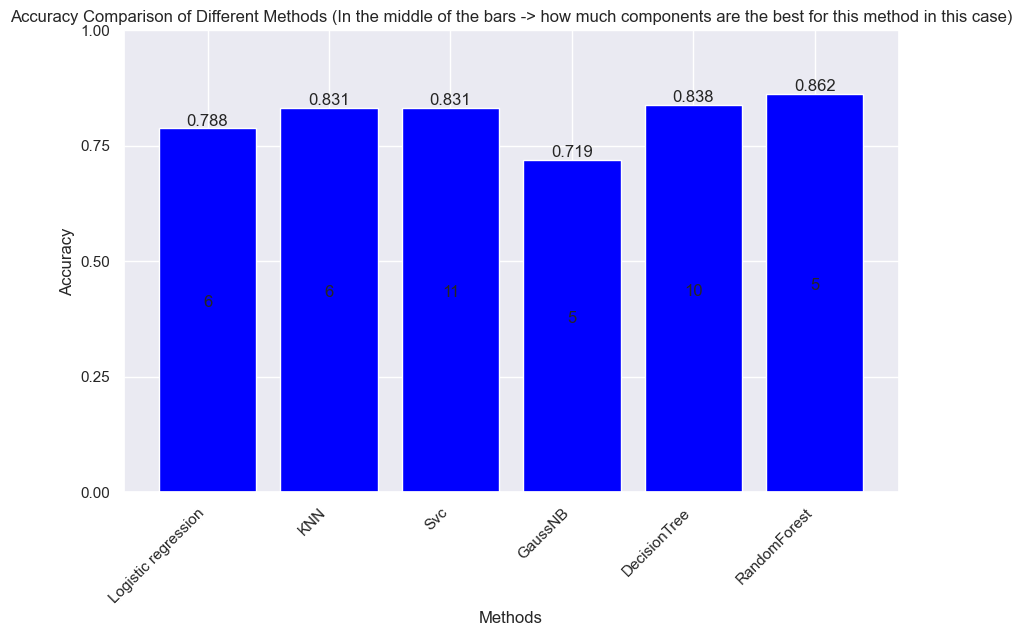

In [165]:
import matplotlib.pyplot as plt

methods = ['Logistic regression', 'KNN', 'Svc', 'GaussNB', 'DecisionTree', 'RandomForest']
num_of_components = [best_indexl+1,best_indexk+1,best_indexs+1,best_indexn+1,best_indexd+1,best_indexr+1]
accuracy_values = [best_logist, best_knn, best_svc, best_gauss, best_dec_tree, best_rf]

plt.figure(figsize=(10, 6))

bars = plt.bar(methods, accuracy_values, color='blue')
plt.ylim(0, 1)
plt.title('Accuracy Comparison of Different Methods (In the middle of the bars -> how much components are the best for this method in this case)')
plt.xlabel('Methods')
plt.ylabel('Accuracy')

for i, value in enumerate(accuracy_values):
    plt.text(i, value, f'{round(value, 3)}', ha='center', va='bottom')
'''for i, value in enumerate(num_of_components):
    plt.text(i, value, f'{value}', ha='center', va='bottom')'''
for bar, value in zip(bars, num_of_components):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()/2, round(value, 3),
             ha='center', va='bottom')

# Set the x-tick labels
plt.xticks(methods, rotation=45, ha='right')

# Set the y-tick labels
plt.yticks([0, 0.25, 0.5, 0.75, 1])

plt.show()
plt.show()

## Conclusions

### It would seem that all of the models have achieved at least satisfactory accuracy. Some of the methods (Naive Bayes, KNN, Logistic regression, RandomForest) seem to prefer using smaller amount of information during processing, whereas other (SVC, Decision tree) can use more information to their advantage effectively. It is important to see that none of the models has used all variables, meaning that Principal component analysis could be a very useful tool